In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x,y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])

In [3]:
n_data = len(correct_data)
input_data = np.array(input_data) #리스트를 넘파이배열로
correct_data = np.array(correct_data) #리스트를 넘파이배열로

In [4]:
n_in = 2 #입력 2개
n_mid = 6 #은닉층 6개
n_out = 2 #출력 2개

In [5]:
wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1 #학습률
epoch = 101
interval = 10 #중간결과 10개마다 확인

In [6]:
#은닉층 클래스
class MiddleLayer:
    def __init__(self, n_upper, n): #이전층 노드갯수(n_upper)와 출력하려는 노드갯수(n)
        self.w = wb_width * np.random.randn(n_upper, n) #row n_upper개, column n개
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1-self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
#출력층 클래스
class OutputLayer:
    def __init__(self, n_upper, n): #이전층 노드갯수(n_upper)와 출력하려는 노드갯수(n)
        self.w = wb_width * np.random.randn(n_upper, n) #row n_upper개, column n개
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x): #순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims = True) #소프트맥스 함수
        
    def backward(self, t): #역전파
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [8]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

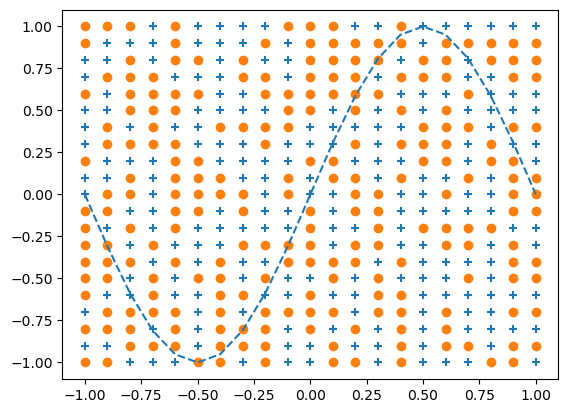

Epoch:0/101 Error:-0.36375051752488535


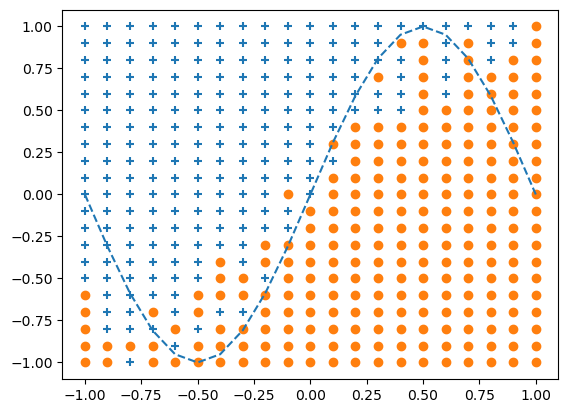

Epoch:10/101 Error:-0.15622453819995213


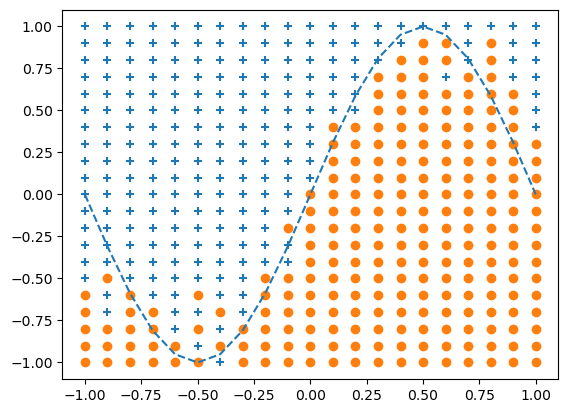

Epoch:20/101 Error:-0.11167772628375568


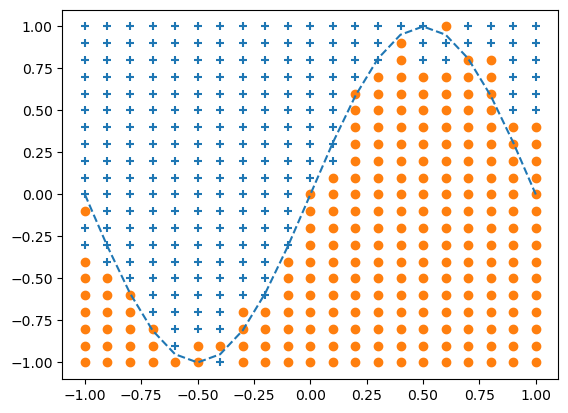

Epoch:30/101 Error:-0.0809578650398086


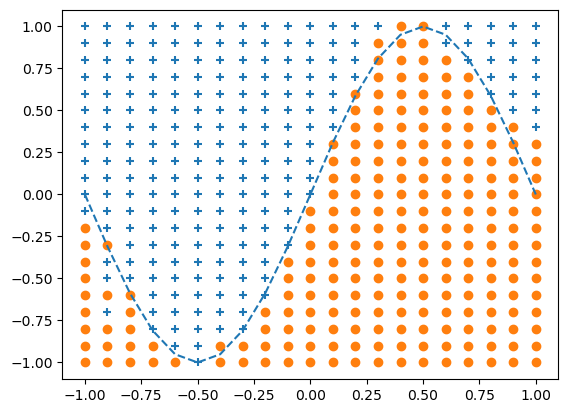

Epoch:40/101 Error:-0.05793420835357117


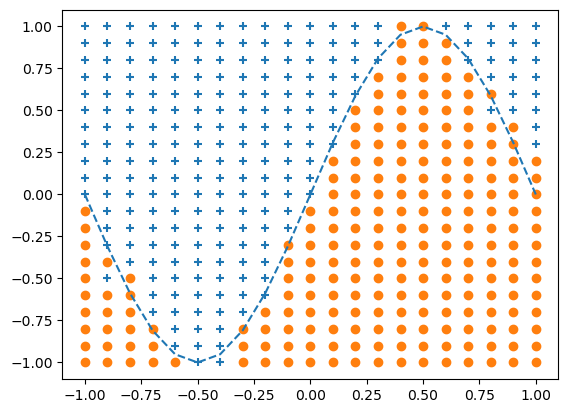

Epoch:50/101 Error:-0.047993331505357305


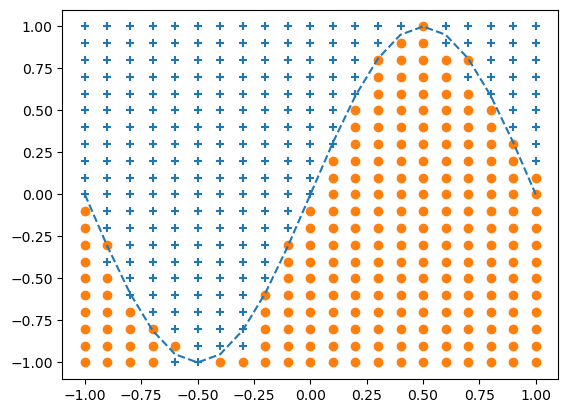

Epoch:60/101 Error:-0.042697934499171065


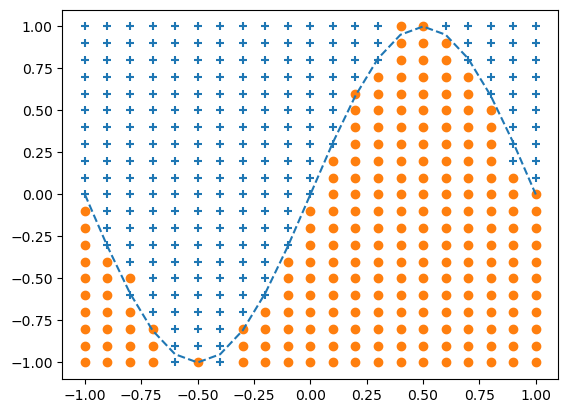

Epoch:70/101 Error:-0.03903233863359557


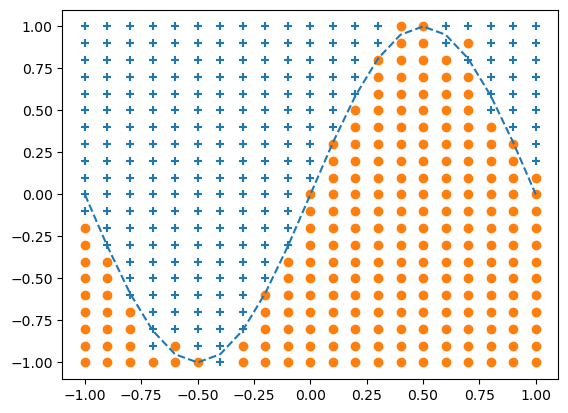

Epoch:80/101 Error:-0.03462235898889705


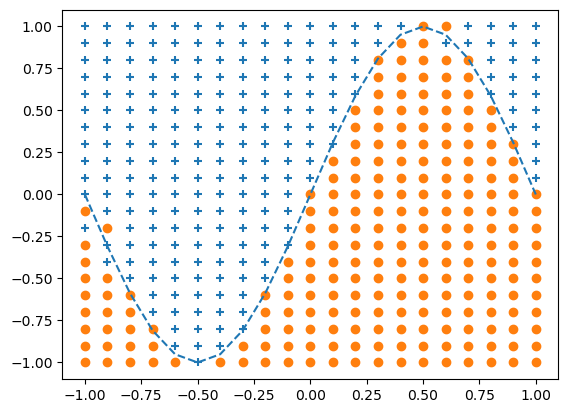

Epoch:90/101 Error:-0.031849066180655645


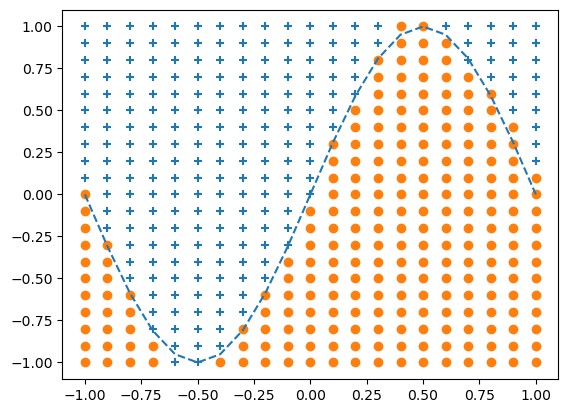

Epoch:100/101 Error:-0.031336412452842397


In [9]:
sin_data = np.sin(np.pi * X)
for i in range(epoch):
    index_random = np.arange(n_data) 
    np.random.shuffle(index_random)
    
    total_error = 0  #1은 sin함수보다 위 2는 sin함수보다 아래
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx] #타겟
        
        #순전파
        middle_layer.forward(x.reshape(1, 2)) #행 1개,열 2개 (입력 2개)
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1, 2))
        middle_layer.backward(output_layer.grad_x)
        
        #가중치, 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) # 1차원으로 알아서 계산할것
            total_error += 1.0/2.0 * np.sum(t * np.log(y + 1e-7)) #교차엔트로피
            
            if y[0]> y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
        
            
    if i % interval == 0:
        plt.plot(X, sin_data, linestyle = 'dashed')
        plt.scatter(x_1, y_1, marker='+')
        plt.scatter(x_2, y_2, marker='o')
        plt.show()
        
        print('Epoch:' + str(i) + '/' + str(epoch), 'Error:' + str(total_error/n_data))